# A short notebook for averaging strike and dips for bedding corrections

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
%matplotlib inline

First, we take the bedding measurements from the T21 stratagraphic section and put them in a table. These measurements were taken on individual planes and need to be averaged to derive an approximate tilt orientation for the entire T21 section.

In [32]:
strike_dip = [[115,74],[112,63],[110,70],[107,72],[109,68]]

In [33]:
bedding_data = pd.DataFrame(strike_dip,columns=['strike','dip'])

In [34]:
bedding_data['pole_trend'] = bedding_data['strike']-90
bedding_data['pole_plunge'] = 90 - bedding_data['dip']
bedding_data

,strike,dip,pole_trend,pole_plunge
0,115,74,25,16
1,112,63,22,27
2,110,70,20,20
3,107,72,17,18
4,109,68,19,22


The best way to take the average of planes is to calculate the poles to each plane and take a mean of that "Fisherian" distribution. The plane perpendicular to the mean is the best average of the measured bedding planes.

In [35]:
bedding_poles = ipmag.make_di_block(bedding_data['pole_trend'],bedding_data['pole_plunge'])
bedding_poles_mean = pmag.fisher_mean(bedding_poles)
bedding_poles_mean

{'alpha95': 4.8303952956055953,
 'csd': 5.1036209180760634,
 'dec': 20.600862352537245,
 'inc': 20.620271512198421,
 'k': 251.89133037880623,
 'n': 5,
 'r': 4.9841201362746999}

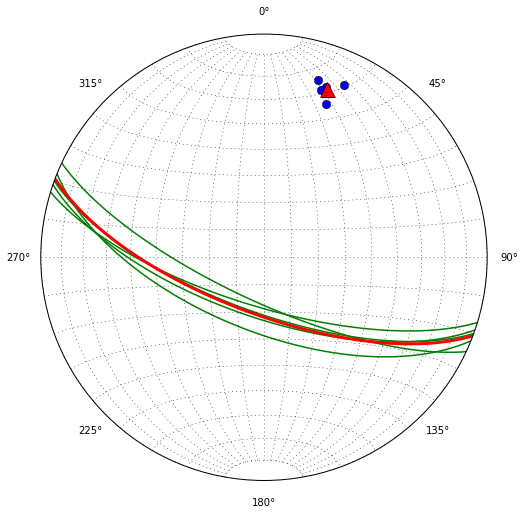

110.600862353 69.3797284878


In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

mean_strike = bedding_poles_mean['dec'] + 90.0
mean_dip = 90.0 - bedding_poles_mean['inc']

ax.plane(bedding_data['strike'],bedding_data['dip'], 'g-', linewidth=1.5)
ax.pole(bedding_data['strike'],bedding_data['dip'], 'bo', markersize=8)
ax.plane(mean_strike,mean_dip, 'r-', linewidth=3)
ax.pole(mean_strike,mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print mean_strike,mean_dip